# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating DataFrame

In [2]:
train=pd.read_csv('Train_Loan_Home.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv('Test_Loan_Home.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test['ApplicantIncome']=test['ApplicantIncomeMonthly']
test['CoapplicantIncome']=test['CoapplicantIncomeMonthly']
test['LoanAmount']=test['LoanAmountThousands']
test['Loan_Amount_Term']=test['Loan_Amount_Term_Months']
test.drop(columns=['ApplicantIncomeMonthly','LoanAmountThousands','CoapplicantIncomeMonthly','Loan_Amount_Term_Months'],inplace=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,5720,0,110.0,360.0
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,3076,1500,126.0,360.0
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,5000,1800,208.0,360.0
3,LP001035,Male,Yes,2,Graduate,No,NaN,Urban,2340,2546,100.0,360.0
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,3276,0,78.0,360.0


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))


#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Loan_ID", axis = 1, inplace = True)
test.drop("Loan_ID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (614, 13) 
The test data size before dropping Id feature is : (367, 12) 

The train data size after dropping Id feature is : (614, 12) 
The test data size after dropping Id feature is : (367, 11) 


# Joining Both the DataFrame

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Loan_Status.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Loan_Status'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (981, 11)


C:\Users\Asad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [7]:
all_data.head(20)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,Yes,Semiurban,No


# Data Visualization

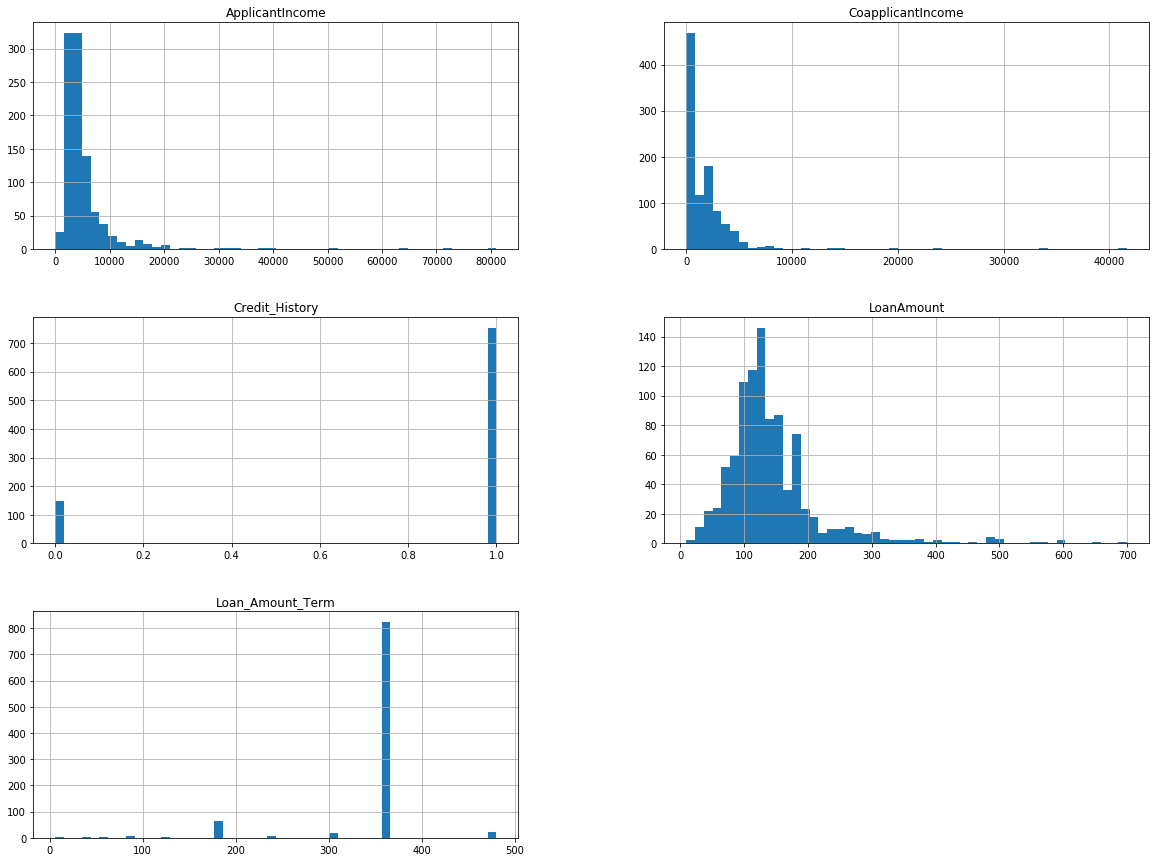

In [8]:
all_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
all_data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Married               object
Property_Area         object
Self_Employed         object
dtype: object

In [10]:
all_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       79
Dependents           25
Education             0
Gender               24
LoanAmount           27
Loan_Amount_Term     20
Married               3
Property_Area         0
Self_Employed        55
dtype: int64

In [11]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Credit_History,8.053007
Self_Employed,5.606524
LoanAmount,2.752294
Dependents,2.548420
Gender,2.446483
Loan_Amount_Term,2.038736
Married,0.305810


Text(0.5, 1.0, 'Percent missing data by feature')

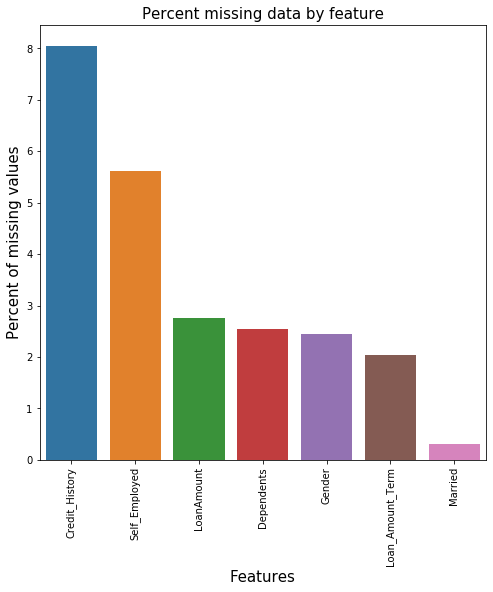

In [12]:
import seaborn as sns
plt.subplots(figsize=(8, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

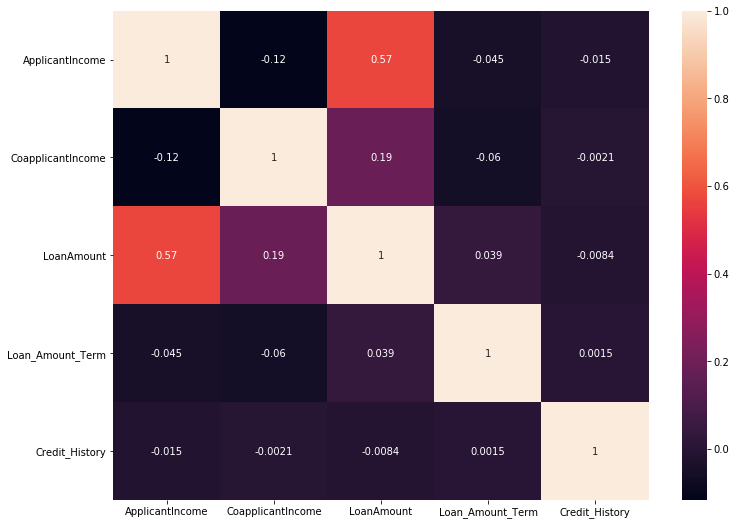

In [13]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,annot=True)

In [14]:
all_data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [15]:
all_data.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [16]:
all_data['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [17]:
all_data['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [18]:
all_data['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [19]:
cols=['Dependents','Married','Gender','Credit_History','Self_Employed']
all_data[cols].head()

,Dependents,Married,Gender,Credit_History,Self_Employed
0,0,No,Male,1.0,No
1,1,Yes,Male,1.0,No
2,0,Yes,Male,1.0,Yes
3,0,Yes,Male,1.0,No
4,0,No,Male,1.0,No


In [20]:
from sklearn.impute import SimpleImputer

for col in cols:
    all_data[col]=SimpleImputer(strategy='most_frequent').fit_transform(all_data[[col]])

In [21]:
all_data[cols].isnull().sum()

Dependents        0
Married           0
Gender            0
Credit_History    0
Self_Employed     0
dtype: int64

In [22]:
all_data['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [23]:
all_data['LoanAmount'].fillna(all_data['LoanAmount'].mean(),inplace=True)
all_data['Loan_Amount_Term'].fillna(all_data['Loan_Amount_Term'].mean(),inplace=True)

In [24]:
all_data[['LoanAmount','Loan_Amount_Term']].head()

,LoanAmount,Loan_Amount_Term
0,142.51153,360.0
1,128.00000,360.0
2,66.00000,360.0
3,120.00000,360.0
4,141.00000,360.0


In [25]:
all_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

In [26]:
cols_obj=all_data.select_dtypes(include=object).columns

# Feature Engineering

In [27]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in cols_obj:
    lb.fit(list(all_data[col].values)) 
    all_data[col] = lb.transform(list(all_data[col].values))

In [28]:
all_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,0,1,142.51153,360.0,0,2,0
1,4583,1508.0,1.0,1,0,1,128.00000,360.0,1,0,0
2,3000,0.0,1.0,0,0,1,66.00000,360.0,1,2,1
3,2583,2358.0,1.0,0,1,1,120.00000,360.0,1,2,0
4,6000,0.0,1.0,0,0,1,141.00000,360.0,0,2,0


In [29]:
all_data.CoapplicantIncome.value_counts()

0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
1666.0      5
700.0       4
1800.0      4
1250.0      4
1750.0      3
2250.0      3
5625.0      3
3167.0      3
2925.0      3
2900.0      3
3750.0      3
1300.0      3
1625.0      3
2166.0      3
1917.0      3
1500.0      3
1560.0      3
1083.0      3
1459.0      3
3583.0      3
2400.0      3
2167.0      3
833.0       2
5000.0      2
1600.0      2
         ... 
7916.0      1
2988.0      1
2108.0      1
5105.0      1
7250.0      1
4614.0      1
2079.0      1
3369.0      1
2138.0      1
1380.0      1
2773.0      1
2367.0      1
828.0       1
187.0       1
2125.0      1
6667.0      1
1425.0      1
3541.0      1
7166.0      1
3033.0      1
1863.0      1
1779.0      1
3338.0      1
5500.0      1
7101.0      1
1131.0      1
4700.0      1
2374.0      1
5302.0      1
3422.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [30]:
all_data.CoapplicantIncome.replace(0.0,np.nan,inplace=True)

In [31]:
all_data['CoapplicantIncome'].fillna(all_data['CoapplicantIncome'].mean(),inplace=True)

In [32]:
all_data.head(20)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,2846.883913,1.0,0,0,1,142.51153,360.000000,0,2,0
1,4583,1508.000000,1.0,1,0,1,128.00000,360.000000,1,0,0
2,3000,2846.883913,1.0,0,0,1,66.00000,360.000000,1,2,1
3,2583,2358.000000,1.0,0,1,1,120.00000,360.000000,1,2,0
4,6000,2846.883913,1.0,0,0,1,141.00000,360.000000,0,2,0
5,5417,4196.000000,1.0,2,0,1,267.00000,360.000000,1,2,1
6,2333,1516.000000,1.0,0,1,1,95.00000,360.000000,1,2,0
7,3036,2504.000000,0.0,3,0,1,158.00000,360.000000,1,1,0
8,4006,1526.000000,1.0,2,0,1,168.00000,360.000000,1,2,0
9,12841,10968.000000,1.0,1,0,1,349.00000,360.000000,1,1,0


In [33]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [34]:
train.shape

(614, 11)

In [35]:
test.shape

(367, 11)

# Creating Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr=Pipeline([('Scaler1',MinMaxScaler()),('lr_classifier',LogisticRegression())])
knn=Pipeline([('Scaler2',MinMaxScaler()),('knn_classifier',KNeighborsClassifier())])
rf=Pipeline([('Scaler3',MinMaxScaler()),('rf_classifier',RandomForestClassifier())])

#making the list of pipeline
pipelines=[lr,knn,rf]

best_accuracy=0.0
best_pipeline=""

#Dictionary of pipeline and classifier types for ease of reference
pipe_dict={0:'Logistic Regression',1:'K-NN',2:'RandomForest'}

#Fit the pipeline
for pipe in pipelines:
    pipe.fit(train,y_train)

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
#checking which model perform best
for i, model in enumerate(pipelines):
    print('{} Test Accuray:{}'.format(pipe_dict[i],model.score(train,y_train)))

Logistic Regression Test Accuray:0.8094462540716613
K-NN Test Accuray:0.8241042345276873
RandomForest Test Accuray:0.990228013029316


# Using Random Forest Classifier

In [38]:
clf=RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
clf.fit(train,y_train)
pred=clf.predict(test)
pred[:5]

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [40]:
#checking accuracy of the classifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#cross validation score
score=cross_val_score(clf,train,y_train,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

#cross validation prediction
predict=cross_val_predict(clf,train,y_train,cv=4)
print('Predicts=',predict[0:5])


Score= [0.73376623 0.79220779 0.80392157 0.7254902 ]
Score mean= 0.7638464476699771
Predicts= ['Y' 'Y' 'Y' 'Y' 'Y']


# Using RandomizedSearchCV for Hyperparameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid  
param_dist = {'n_estimators':[10,20,40,60,80,100],
              'max_features': ['sqrt', 'log2','auto']}  

# Instantiating RandomizedSearchCV object 
random_search = RandomizedSearchCV(clf, param_dist, cv = 4,scoring='accuracy',error_score=0) 
  
random_search.fit(train,y_train) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(random_search.best_params_)) 
print("Best score is {}".format(random_search.best_score_))

Tuned Parameters: {'n_estimators': 60, 'max_features': 'auto'}
Best score is 0.7996742671009772


In [43]:
# checking the best Estimator 
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
clf.fit(train,y_train)
clf.score(train,y_train)

1.0

In [46]:
pred=clf.predict(test)
pred[:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [47]:
#cross validation score
score=cross_val_score(clf,train,y_train,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

#cross validation prediction
predict=cross_val_predict(clf,train,y_train,cv=4)
print('Predicts=',predict[0:5])

Score= [0.79220779 0.76623377 0.82352941 0.80392157]
Score mean= 0.7964731347084288
Predicts= ['Y' 'Y' 'Y' 'Y' 'Y']
